In [1]:
# Author: Jake Vanderplas -- <vanderplas@astro.washington.edu>

print(__doc__)

from time import time

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
import matplotlib.patches as patches

from sklearn import manifold, datasets

# Next line to silence pyflakes. This import is needed.
Axes3D

Automatically created module for IPython interactive environment


mpl_toolkits.mplot3d.axes3d.Axes3D

In [2]:
from HSAC import System
import pickle
import os
import torch
import numpy as np

use_cuda = torch.cuda.is_available()
device   = torch.device("cuda" if use_cuda else "cpu")

In [3]:
n_test = 201 #68
system_type = 'Hopper-v2'

In [4]:
iter_ = 9
sys = pickle.load(open(system_type+'_'+str(n_test)+'_'+str(iter_)+'.p','rb'))

In [5]:
data = np.loadtxt('trajectories_'+system_type+'_'+str(n_test)+'_'+str(iter_)+'_test.txt')

In [6]:
data.shape

(9990, 31)

In [7]:
n_points = data.shape[0]
# data = np.array(sys.agent.memory.sample(n_points))
X, color = data[:,:sys.agent.s_dim], data[:,sys.agent.sarsd_dim]
# Y = np.loadtxt('tSNE_'+system_type+'_'+str(n_test)+'_Y_trajectories.txt')
n_neighbors = 50
n_components = 2

In [8]:
batch_size = 555
S = []
for i in range(0,n_points//batch_size):
    states = torch.FloatTensor(data[i*batch_size:(i+1)*batch_size,:sys.agent.s_dim]).to(device)
    S_sampled, P, log_m, _ = sys.agent.macro_space.sample_m_state_and_posterior(states)
    P = P.cpu().detach().numpy()
    S.append(np.where(P.max(1) >= 2/sys.agent.n_m_states, P.argmax(1), np.ones(batch_size)*sys.agent.n_m_states))
# S_sampled = S_sampled.cpu().detach().numpy()
S = np.array(S).reshape(-1)

In [9]:
np.unique(S)

array([0., 1., 2., 3., 4., 5., 6., 8., 9.])

In [10]:
print(S.shape)
print(X.shape)
print(color.shape)

(9990,)
(9990, 11)
(9990,)


t-SNE: 64 sec


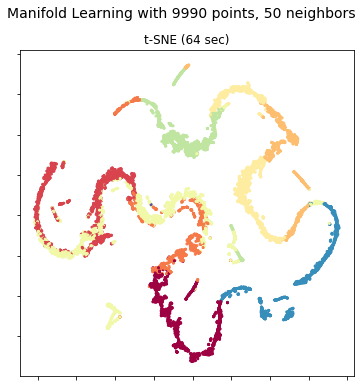

In [11]:
fig = plt.figure(figsize=(6, 6))
plt.suptitle("Manifold Learning with %i points, %i neighbors"
             % (n_points, n_neighbors), fontsize=14)

t0 = time()
tsne = manifold.TSNE(n_components=n_components, init='pca', random_state=0, perplexity=50, learning_rate=1000)
Y = tsne.fit_transform(X)
t1 = time()
print("t-SNE: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(1, 1, 1)
plt.scatter(Y[:, 0], Y[:, 1], c=S, cmap=plt.cm.Spectral, s=4.0)
plt.title("t-SNE (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

plt.show()

In [12]:
np.savetxt('tSNE_'+system_type+'_'+str(n_test)+'_'+str(iter_)+'_Y_trajectories.txt',Y)
np.savetxt('tSNE_'+system_type+'_'+str(n_test)+'_'+str(iter_)+'_X.txt',X)
np.savetxt('tSNE_'+system_type+'_'+str(n_test)+'_'+str(iter_)+'_S_trajectories.txt',S)
np.savetxt('tSNE_'+system_type+'_'+str(n_test)+'_'+str(iter_)+'_data.txt',data)

In [206]:
Y0 = np.loadtxt('tSNE_Hopper-v2_59_Y.txt')
S0 = np.loadtxt('tSNE_Hopper-v2_59_S.txt')

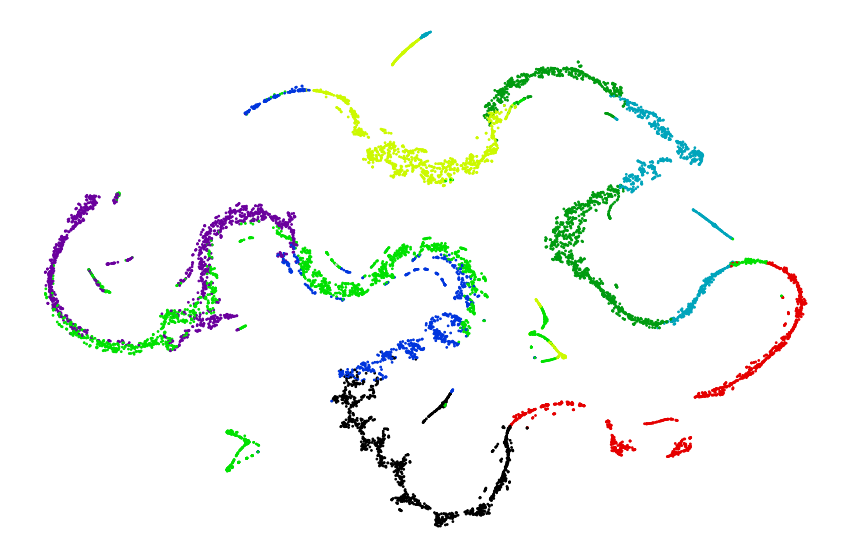

In [15]:
fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(Y[:, 0], Y[:, 1], c=S, cmap=plt.cm.get_cmap('nipy_spectral', 10), s=3.0)
ax.axis('off')
plt.show()
# np.savetxt('tSNE_Hopper-v2_58_Y.txt',Y)
# np.savetxt('tSNE_Hopper-v2_58_X.txt',X)
# np.savetxt('tSNE_Hopper-v2_58_S.txt',S)
# np.savetxt('tSNE_Hopper-v2_58_data.txt',data)
# Possible values are: 
# Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, 
# GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, 
# Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, 
# Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, 
# Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, 
# YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, 
# brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, 
# cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, 
# gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, 
# gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, inferno, inferno_r, jet, jet_r, magma, magma_r, 
# nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, 
# rainbow_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, 
# tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, winter, winter_r

t-SNE: 4e+02 sec


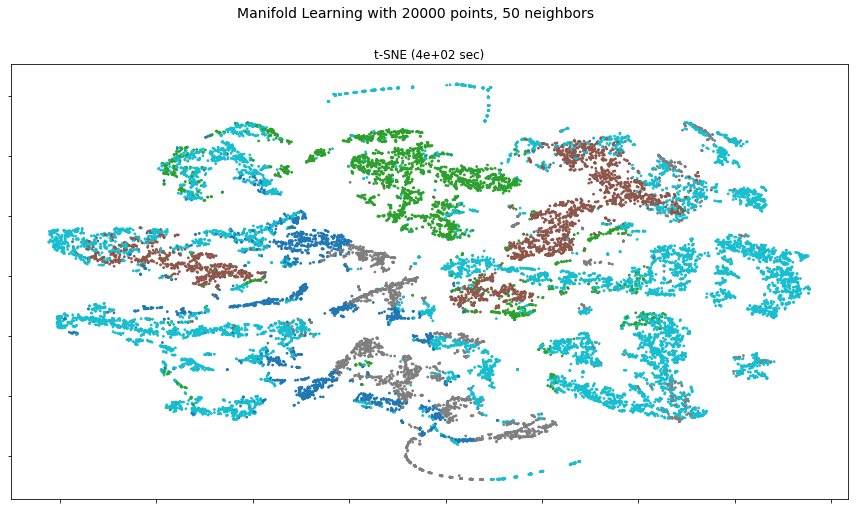

In [155]:
fig = plt.figure(figsize=(15, 8))
plt.suptitle("Manifold Learning with %i points, %i neighbors"
             % (n_points, n_neighbors), fontsize=14)

print("t-SNE: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(1, 1, 1)
plt.scatter(Y[:, 0], Y[:, 1], c=S.astype(int), cmap=plt.cm.get_cmap('tab10', 5), s=3.0)
plt.title("t-SNE (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

plt.show()

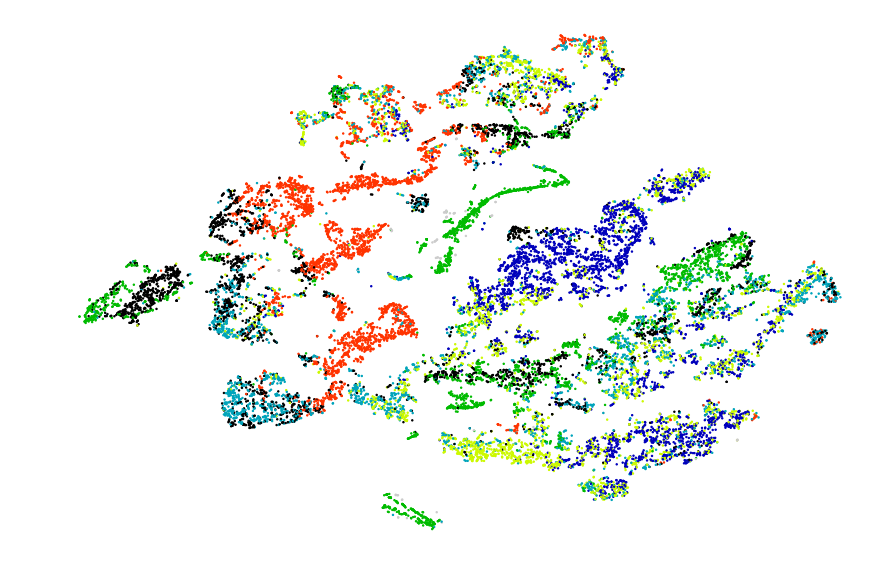

In [205]:
fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(Y[:, 0], Y[:, 1], c=S, cmap=plt.cm.get_cmap('nipy_spectral', 9), s=2.0)
ax.axis('off')
plt.savefig('mstates_'+system_type+'_'+str(n_test)+'.png',dpi=500)
plt.show()
plt.close()

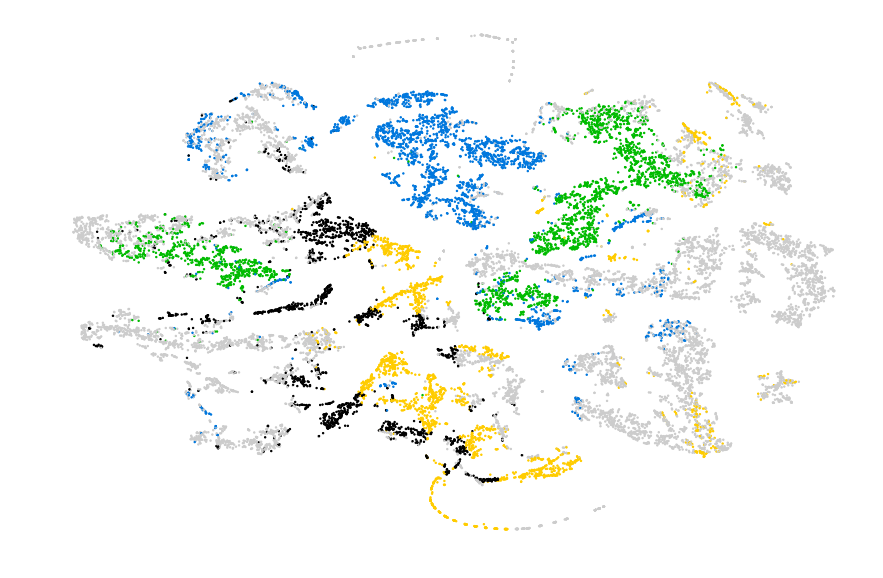

In [207]:
fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(Y0[:, 0], Y0[:, 1], c=S0, cmap=plt.cm.get_cmap('nipy_spectral', 5), s=2.0)
ax.axis('off')
plt.savefig('mstates_'+system_type+'_'+str(n_test-1)+'.png',dpi=500)
plt.show()
plt.close()

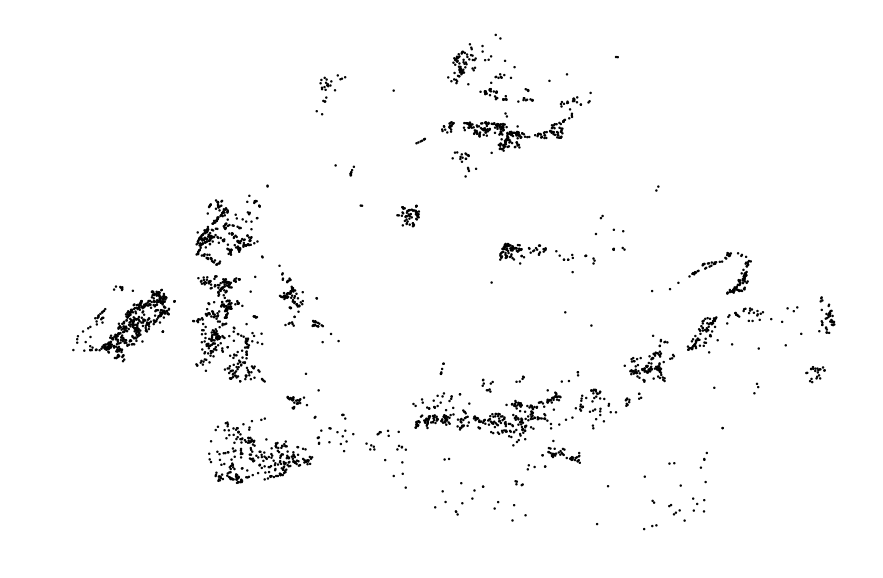

In [209]:
fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(Y[S==1, 0], Y[S==1, 1], c=S[S==1], cmap=plt.cm.get_cmap('nipy_spectral', 7), s=2.0)
ax.axis('off')
plt.show()
plt.close()

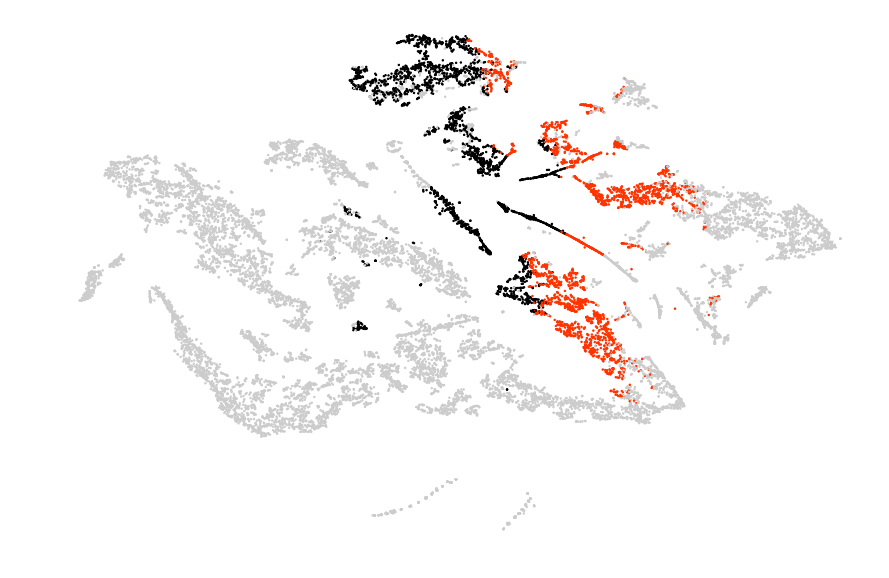

In [16]:
fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(Y[:, 0], Y[:, 1], c=S, cmap=plt.cm.get_cmap('nipy_spectral', 7), s=2.0)
ax.axis('off')
plt.savefig('mstates_'+system_type+'_'+str(n_test)+'.png',dpi=500)
plt.show()
plt.close()

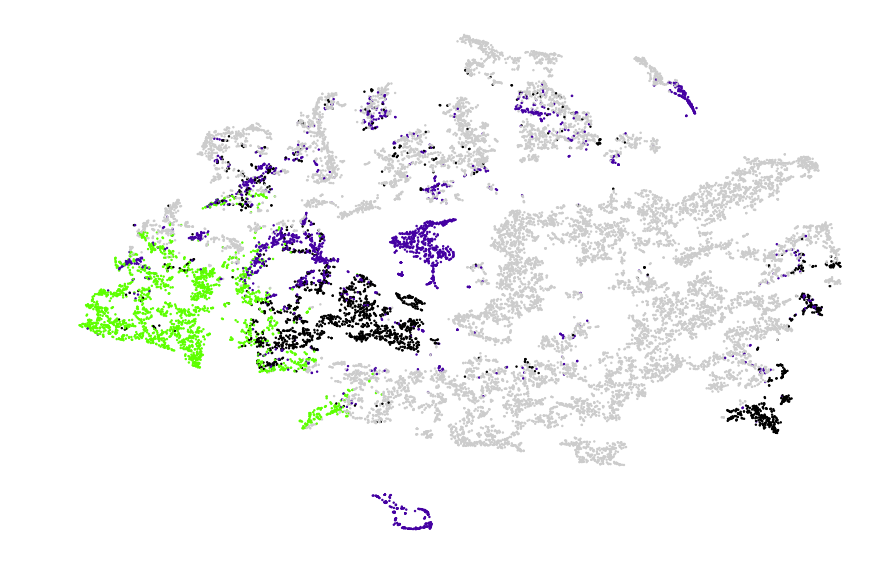

In [8]:
fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(Y[:, 0], Y[:, 1], c=S, cmap=plt.cm.get_cmap('nipy_spectral', 9), s=2.0)
ax.axis('off')
plt.savefig('mstates_'+system_type+'_'+str(n_test)+'.png',dpi=500)
plt.show()
plt.close()

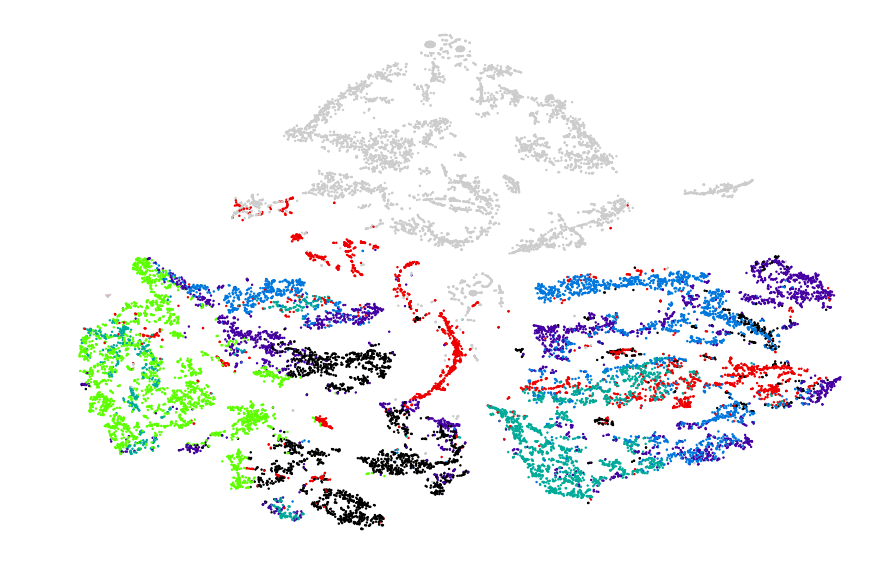

In [9]:
fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(Y[:, 0], Y[:, 1], c=S, cmap=plt.cm.get_cmap('nipy_spectral', 9), s=2.0)
ax.axis('off')
plt.savefig('mstates_'+system_type+'_'+str(n_test)+'.png',dpi=500)
plt.show()
plt.close()

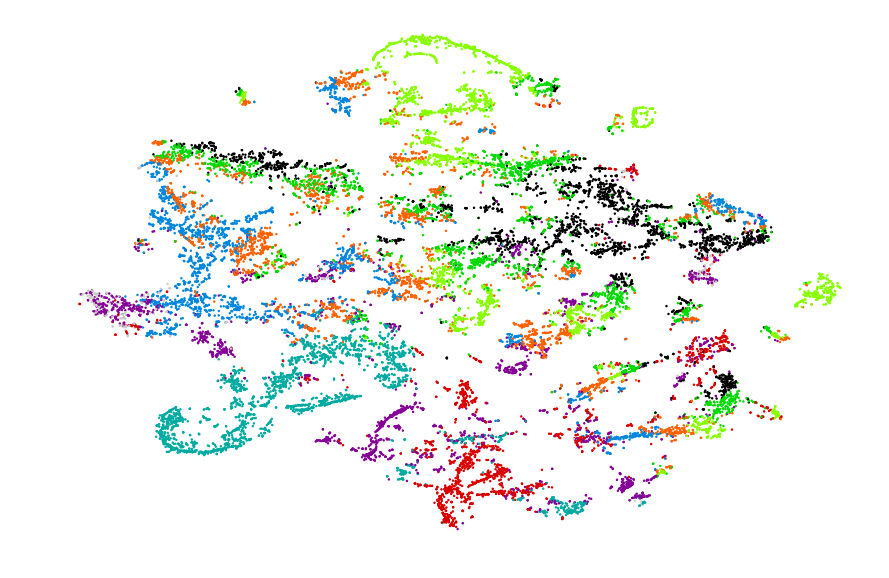

In [18]:
fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(Y[:, 0], Y[:, 1], c=S, cmap=plt.cm.get_cmap('nipy_spectral', 12), s=2.0)
ax.axis('off')
plt.savefig('mstates_'+system_type+'_'+str(n_test)+'_'+str(iter_)+'.png',dpi=500)
plt.show()
plt.close()

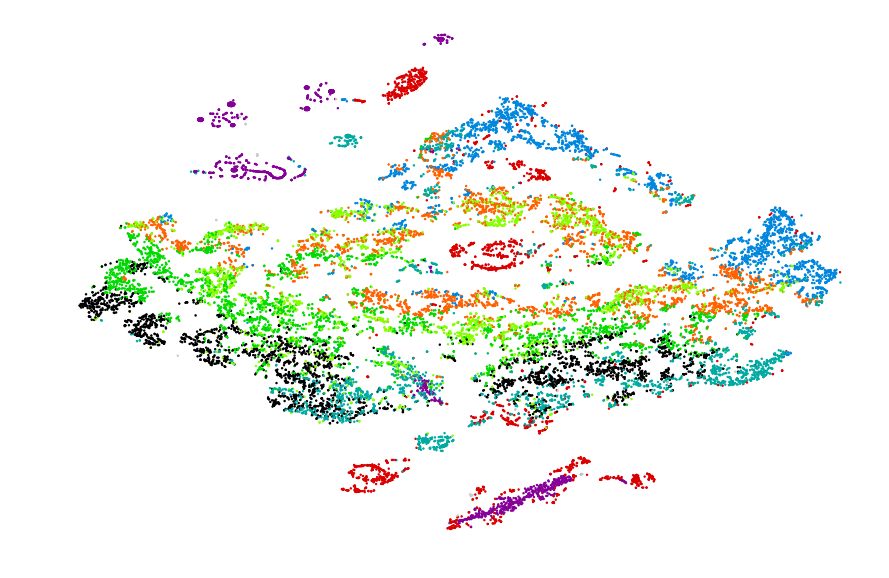

In [10]:
fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(Y[:, 0], Y[:, 1], c=S, cmap=plt.cm.get_cmap('nipy_spectral', 12), s=2.0)
ax.axis('off')
plt.savefig('mstates_'+system_type+'_'+str(n_test)+'_'+str(iter_)+'.png',dpi=500)
plt.show()
plt.close()

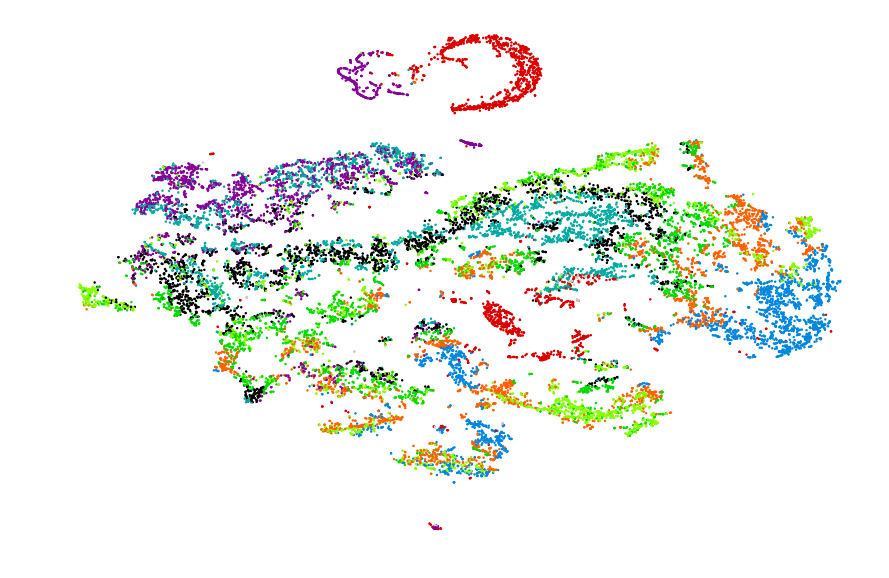

In [10]:
fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(Y[:, 0], Y[:, 1], c=S, cmap=plt.cm.get_cmap('nipy_spectral', 12), s=2.0)
ax.axis('off')
plt.savefig('mstates_'+system_type+'_'+str(n_test)+'_'+str(iter_)+'.png',dpi=500)
plt.show()
plt.close()

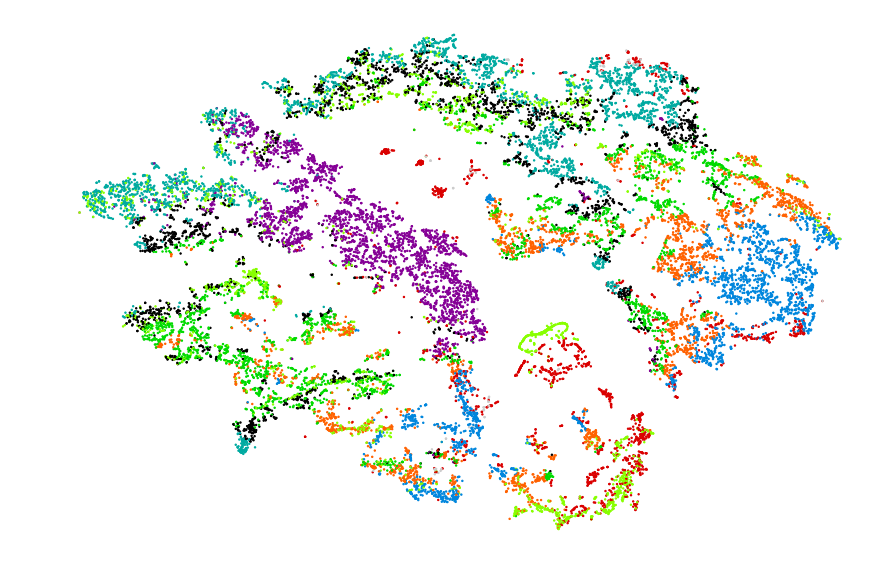

In [10]:
fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(Y[:, 0], Y[:, 1], c=S, cmap=plt.cm.get_cmap('nipy_spectral', 12), s=2.0)
ax.axis('off')
plt.savefig('mstates_'+system_type+'_'+str(n_test)+'_'+str(iter_)+'.png',dpi=500)
plt.show()
plt.close()

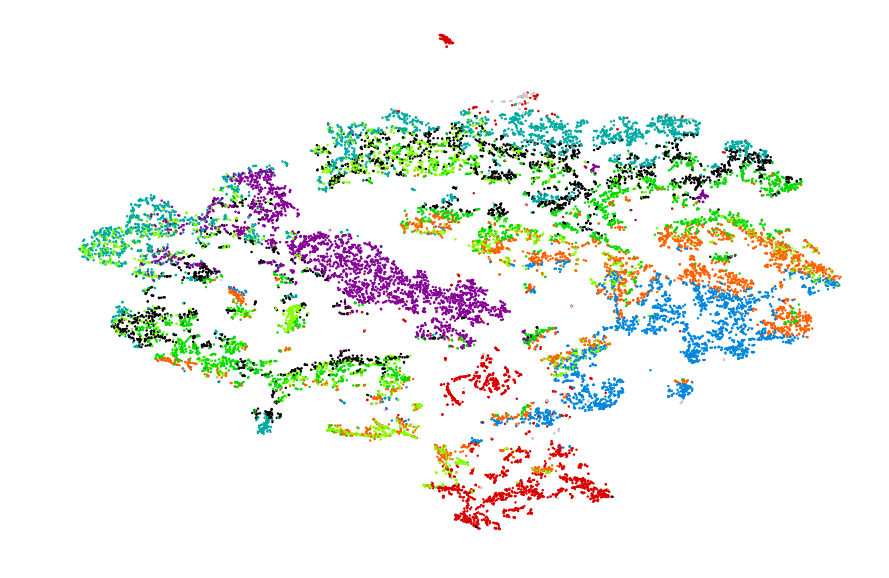

In [10]:
fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(Y[:, 0], Y[:, 1], c=S, cmap=plt.cm.get_cmap('nipy_spectral', 12), s=2.0)
ax.axis('off')
plt.savefig('mstates_'+system_type+'_'+str(n_test)+'_'+str(iter_)+'.png',dpi=500)
plt.show()
plt.close()

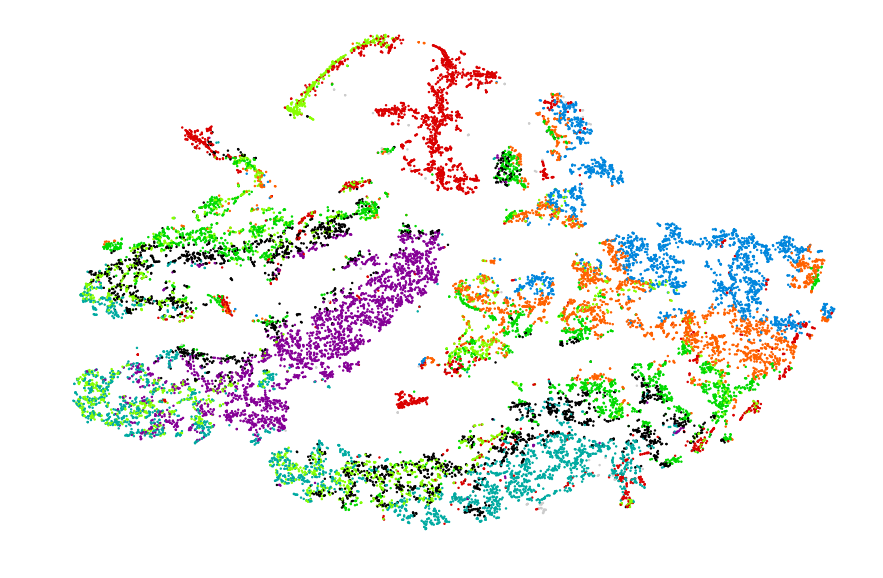

In [10]:
fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(Y[:, 0], Y[:, 1], c=S, cmap=plt.cm.get_cmap('nipy_spectral', 12), s=2.0)
ax.axis('off')
plt.savefig('mstates_'+system_type+'_'+str(n_test)+'_'+str(iter_)+'.png',dpi=500)
plt.show()
plt.close()

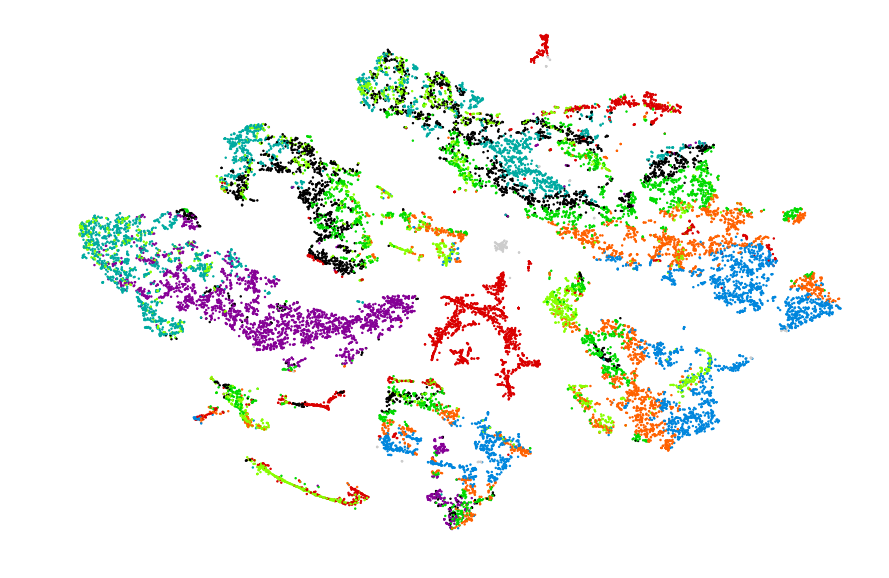

In [10]:
fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(Y[:, 0], Y[:, 1], c=S, cmap=plt.cm.get_cmap('nipy_spectral', 12), s=2.0)
ax.axis('off')
plt.savefig('mstates_'+system_type+'_'+str(n_test)+'_'+str(iter_)+'.png',dpi=500)
plt.show()
plt.close()

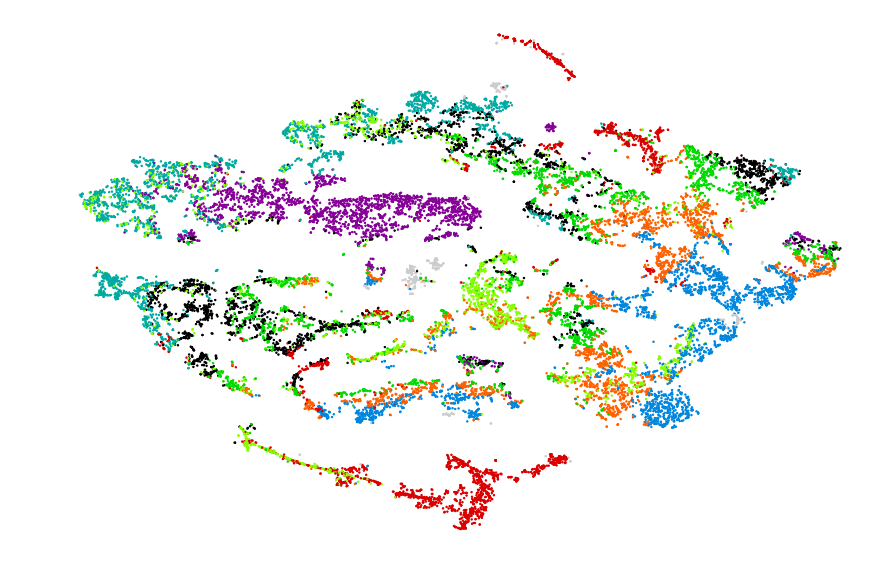

In [10]:
fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(Y[:, 0], Y[:, 1], c=S, cmap=plt.cm.get_cmap('nipy_spectral', 12), s=2.0)
ax.axis('off')
plt.savefig('mstates_'+system_type+'_'+str(n_test)+'_'+str(iter_)+'.png',dpi=500)
plt.show()
plt.close()

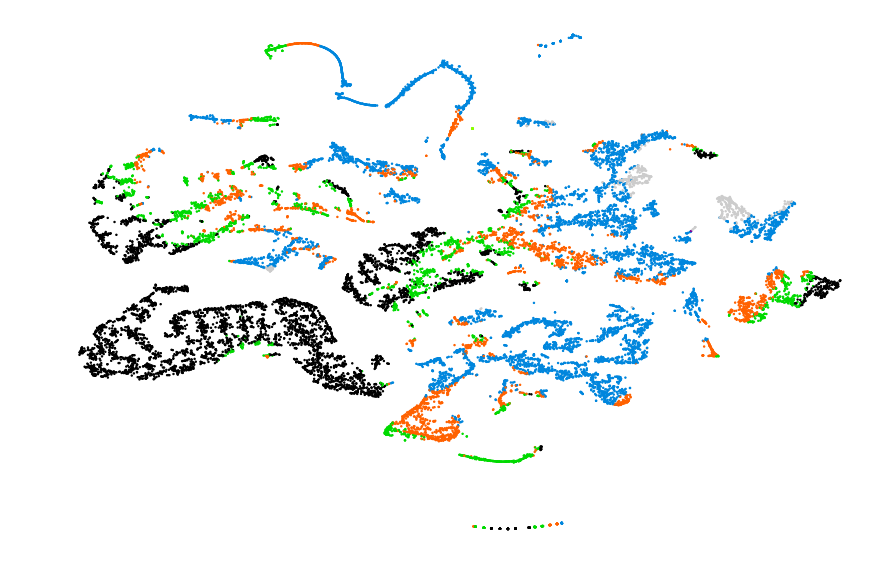

In [10]:
fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(Y[:, 0], Y[:, 1], c=S, cmap=plt.cm.get_cmap('nipy_spectral', 12), s=2.0)
ax.axis('off')
plt.savefig('mstates_'+system_type+'_'+str(n_test)+'_'+str(iter_)+'_trajectories.png',dpi=500)
plt.show()
plt.close()

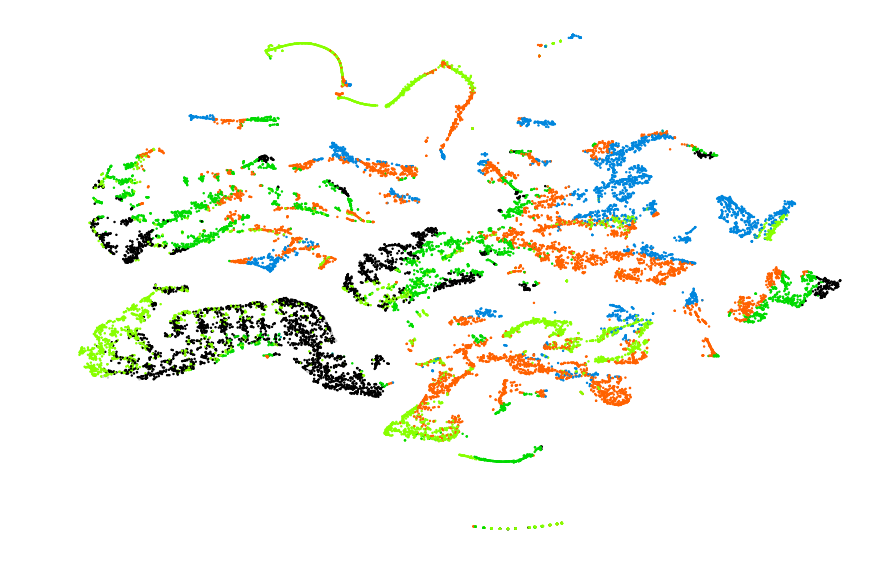

In [9]:
fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(Y[:, 0], Y[:, 1], c=S, cmap=plt.cm.get_cmap('nipy_spectral', 12), s=2.0)
ax.axis('off')
plt.savefig('mstates_'+system_type+'_'+str(n_test)+'_'+str(iter_)+'_trajectories.png',dpi=500)
plt.show()
plt.close()

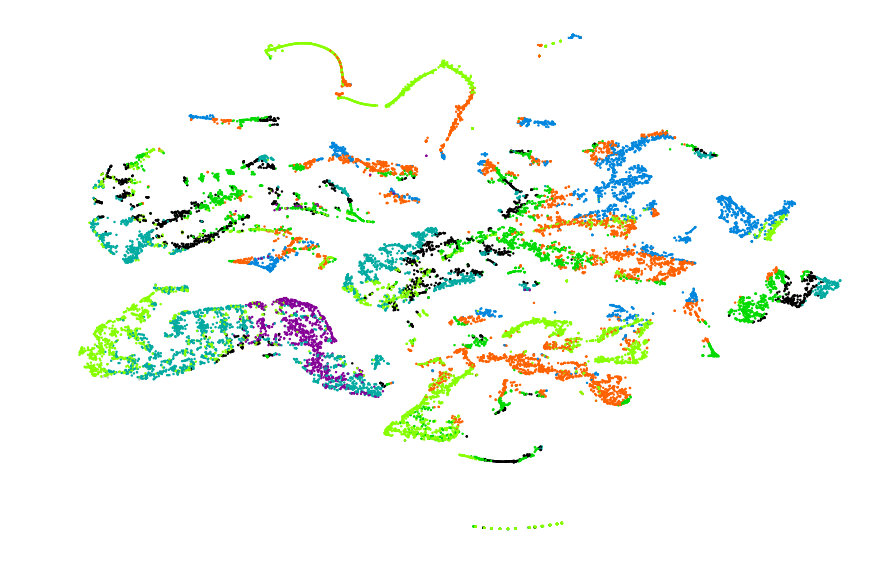

In [9]:
fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(Y[:, 0], Y[:, 1], c=S, cmap=plt.cm.get_cmap('nipy_spectral', 12), s=2.0)
ax.axis('off')
plt.savefig('mstates_'+system_type+'_'+str(n_test)+'_'+str(iter_)+'_trajectories.png',dpi=500)
plt.show()
plt.close()

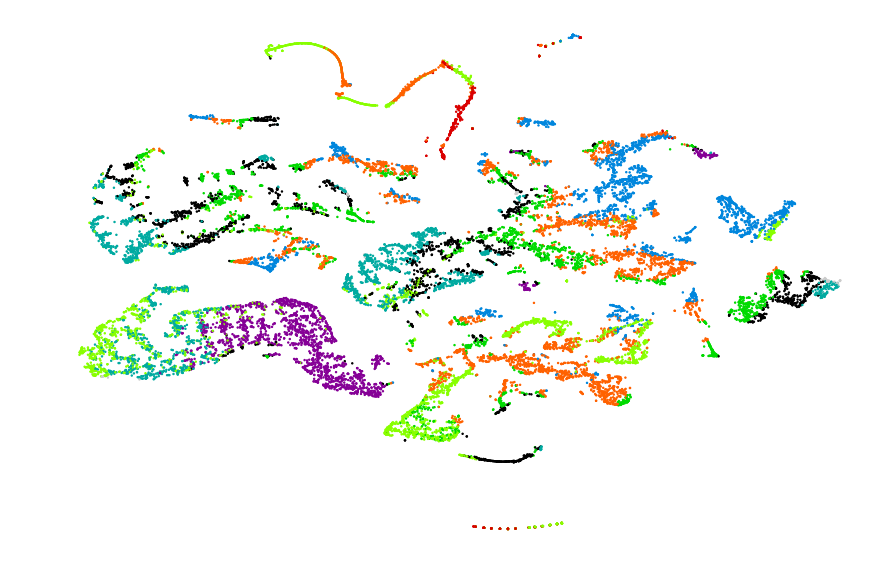

In [10]:
fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(Y[:, 0], Y[:, 1], c=S, cmap=plt.cm.get_cmap('nipy_spectral', 12), s=2.0)
ax.axis('off')
plt.savefig('mstates_'+system_type+'_'+str(n_test)+'_'+str(iter_)+'_trajectories.png',dpi=500)
plt.show()
plt.close()

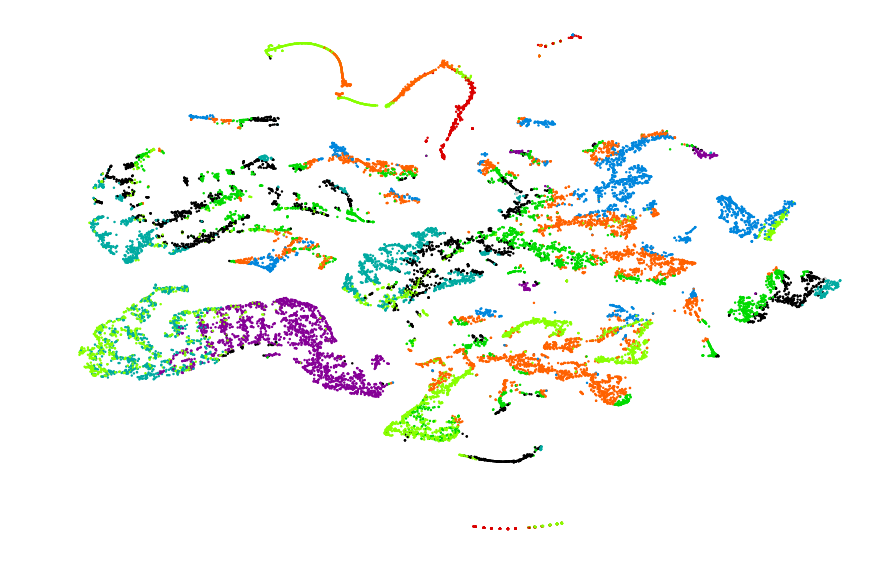

In [9]:
fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(Y[:, 0], Y[:, 1], c=S, cmap=plt.cm.get_cmap('nipy_spectral', 12), s=2.0)
ax.axis('off')
plt.savefig('mstates_'+system_type+'_'+str(n_test)+'_'+str(iter_)+'_trajectories.png',dpi=500)
plt.show()
plt.close()

In [23]:
S[0] = 8

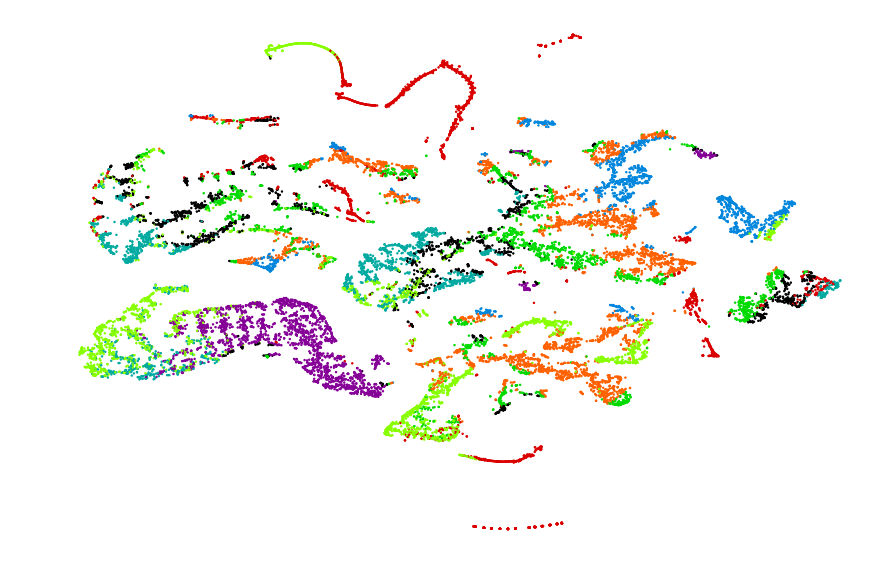

In [25]:
fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(Y[:, 0], Y[:, 1], c=S, cmap=plt.cm.get_cmap('nipy_spectral', 12), s=2.0)
ax.axis('off')
plt.savefig('mstates_'+system_type+'_'+str(n_test)+'_'+str(iter_)+'_trajectories.png',dpi=500)
plt.show()
plt.close()

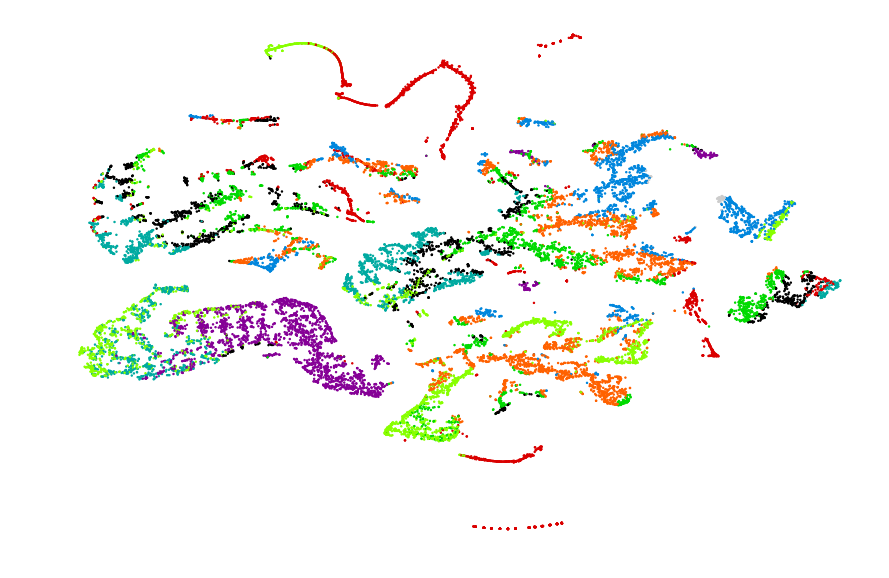

In [9]:
fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(Y[:, 0], Y[:, 1], c=S, cmap=plt.cm.get_cmap('nipy_spectral', 12), s=2.0)
ax.axis('off')
plt.savefig('mstates_'+system_type+'_'+str(n_test)+'_'+str(iter_)+'_trajectories.png',dpi=500)
plt.show()
plt.close()

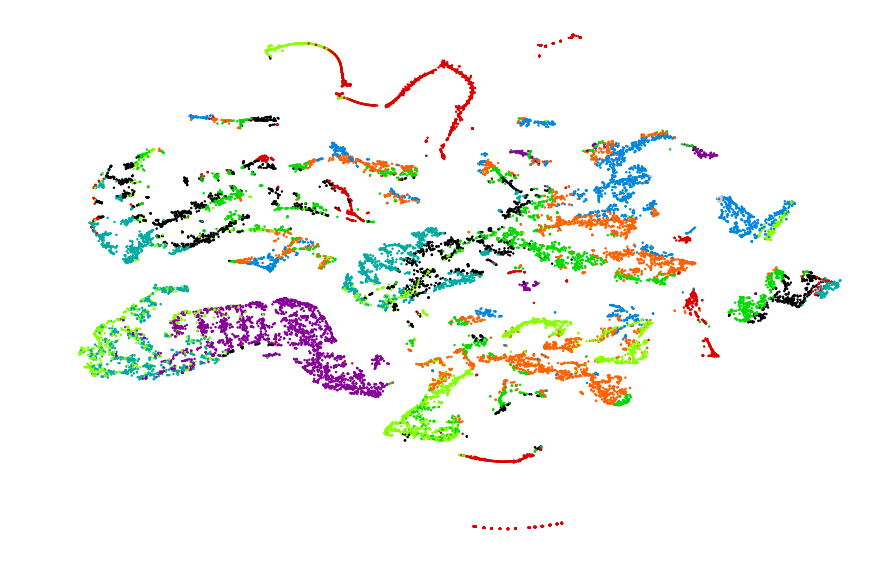

In [9]:
fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(Y[:, 0], Y[:, 1], c=S, cmap=plt.cm.get_cmap('nipy_spectral', 12), s=2.0)
ax.axis('off')
plt.savefig('mstates_'+system_type+'_'+str(n_test)+'_'+str(iter_)+'_trajectories.png',dpi=500)
plt.show()
plt.close()

In [19]:
Y = np.loadtxt('tSNE_'+system_type+'_'+str(n_test)+'_'+str(iter_)+'_Y_trajectories.txt')
Ss = []
for i in range(9,10):
    Ss.append(np.loadtxt('tSNE_'+system_type+'_'+str(n_test)+'_'+str(i)+'_S_trajectories.txt'))

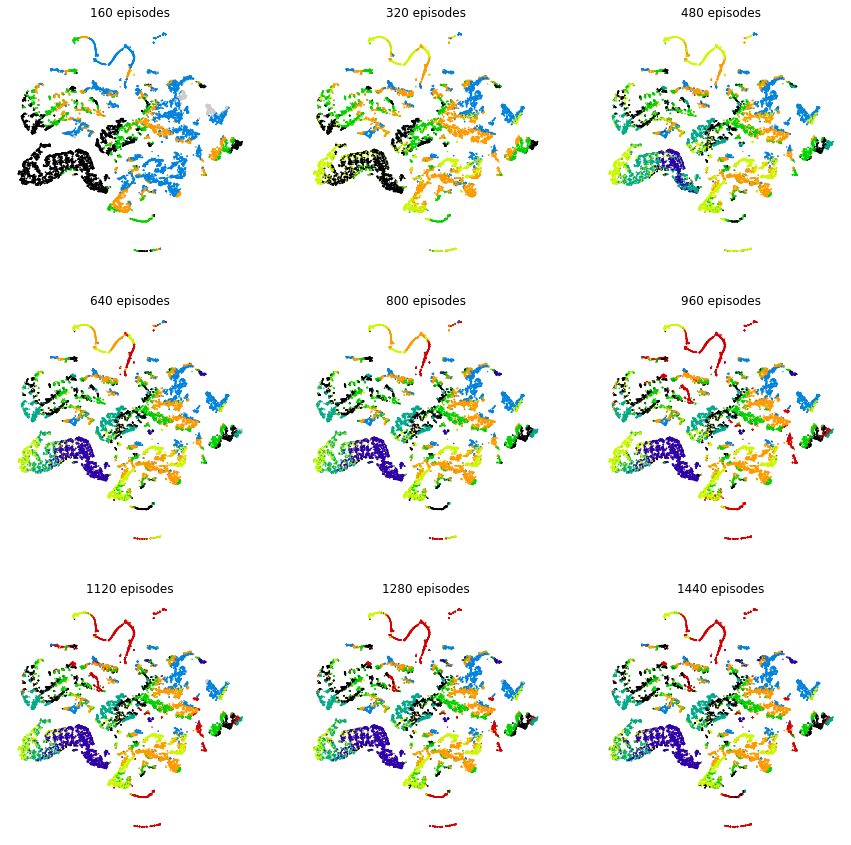

In [5]:
fig, ax = plt.subplots(3,3,figsize=(15,15))
for i in range(0,3):
    for j in range(0,3):
        for k in range(0,9):
            Ss[i*3+j][k] = k
        ax[i,j].scatter(Y[:, 0], Y[:, 1], c=Ss[i*3+j], cmap=plt.cm.get_cmap('nipy_spectral', 16), s=2.0, lw=0.05)
        ax[i,j].axis('off')
        ax[i,j].set_title(str(160*(i*3+j+1))+' episodes')
plt.savefig('mstates_evolution_'+system_type+'_'+str(n_test)+'.png',dpi=500)
plt.show()
plt.close()

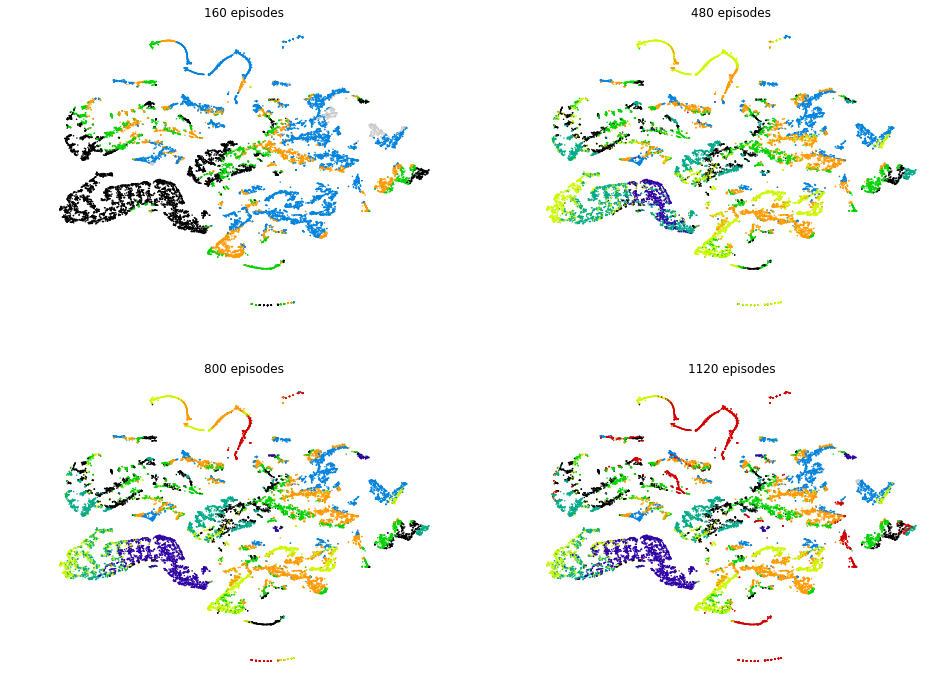

In [18]:
fig, ax = plt.subplots(2,2,figsize=(16,12))
for i in range(0,2):
    for j in range(0,2):
        for k in range(0,9):
            Ss[i*4+j][k] = k
        ax[i,j].scatter(Y[:, 0], Y[:, 1], c=Ss[i*4+2*j], cmap=plt.cm.get_cmap('nipy_spectral', 16), s=2.0, lw=0.05)
        ax[i,j].axis('off')
        ax[i,j].set_title(str(160*(i*4+2*j+1))+' episodes')
plt.savefig('mstates_evolution_'+system_type+'_'+str(n_test)+'_reduced.png',dpi=500)
plt.show()
plt.close()

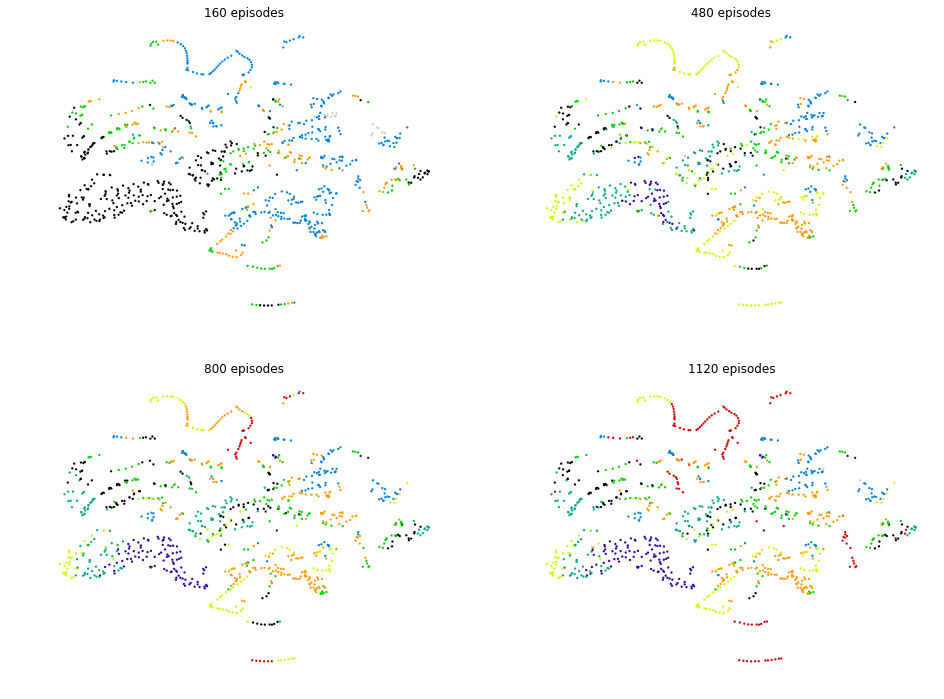

In [25]:
fig, ax = plt.subplots(2,2,figsize=(16,12))
for i in range(0,2):
    for j in range(0,2):
#         for k in range(0,9):
#             Ss[i*4+j][k] = k
        ax[i,j].scatter(Y[1000:2000, 0], Y[1000:2000, 1], c=Ss[i*4+2*j][1000:2000], cmap=plt.cm.get_cmap('nipy_spectral', 16), s=5.0, lw=0.05)
        ax[i,j].axis('off')
        ax[i,j].set_title(str(160*(i*4+2*j+1))+' episodes')
plt.savefig('mstates_evolution_'+system_type+'_'+str(n_test)+'_reduced_one_trajectory.png',dpi=500)
plt.show()
plt.close()

In [26]:
# import cv2
# vidcap = cv2.VideoCapture('Hopper-v2_test_8.avi')
# success,image = vidcap.read()
# count = 0
# while success:
#   cv2.imwrite("frames/frame%d.jpg" % count, image)     # save frame as JPEG file      
#   success,image = vidcap.read()
#   print('Read a new frame: ', success)
#   count += 1

Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame

Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame

Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame

Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame

Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame

Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame

Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame

Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame

Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame

Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame

Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame

Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame

Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame

Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame

Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame

Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame

Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame

Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame

Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame

Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame

Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame

Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame

Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame

Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame

Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame

Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame

Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame

Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame

Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame

Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame

Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame

Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame

Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame

Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame

Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame

Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame

Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame

Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame

Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame

Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame

Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame

Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame

Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame

Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame

Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame

Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame

Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame

Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame

Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame

Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame

Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame

Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame

Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame

Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame

Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame

Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame

Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame

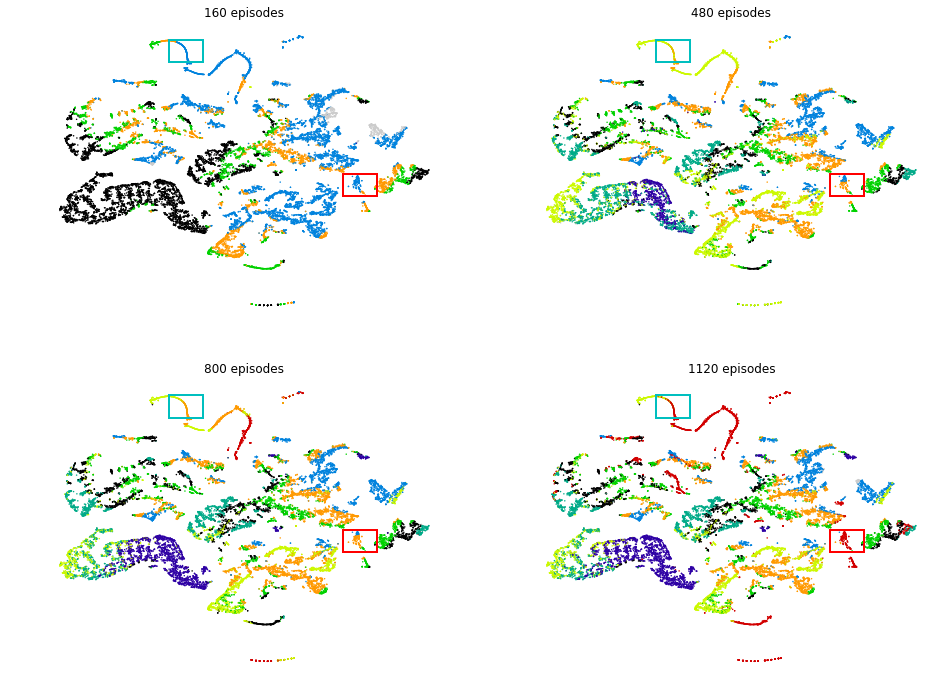

In [10]:
fig, ax = plt.subplots(2,2,figsize=(16,12))
for i in range(0,2):
    for j in range(0,2):
#         for k in range(0,9):
#             Ss[i*4+j][k] = k
        ax[i,j].scatter(Y[:, 0], Y[:, 1], c=Ss[i*4+2*j], cmap=plt.cm.get_cmap('nipy_spectral', 16), s=2.0, lw=0.05)
        ax[i,j].axis('off')
        ax[i,j].set_title(str(160*(i*4+2*j+1))+' episodes')
#         box_1 = patches.Rectangle((Y[1010,0]-10,Y[1010,1]-10),20,20,linewidth=2,edgecolor='r',facecolor='none')
#         ax[i,j].add_patch(box_1)
#         box_2 = patches.Rectangle((Y[1023,0]-10,Y[1023,1]-10),20,20,linewidth=2,edgecolor='b',facecolor='none')
#         ax[i,j].add_patch(box_2)
#         box_3 = patches.Rectangle((Y[1047,0]-10,Y[1047,1]-10),20,20,linewidth=2,edgecolor='g',facecolor='none')
#         ax[i,j].add_patch(box_3)
        box_4 = patches.Rectangle((Y[1073,0]-10,Y[1073,1]-10),20,20,linewidth=2,edgecolor='c',facecolor='none')
        ax[i,j].add_patch(box_4)
#         box_5 = patches.Rectangle((Y[1100,0]-10,Y[1100,1]-10),20,20,linewidth=2,edgecolor='purple',facecolor='none')
#         ax[i,j].add_patch(box_5)
#         box_6 = patches.Rectangle((Y[1135,0]-10,Y[1135,1]-10),20,20,linewidth=2,edgecolor='orange',facecolor='none')
#         ax[i,j].add_patch(box_6)
#         box_7 = patches.Rectangle((Y[1160,0]-10,Y[1160,1]-10),20,20,linewidth=2,edgecolor='black',facecolor='none')
#         ax[i,j].add_patch(box_7)
#         box_8 = patches.Rectangle((Y[1172,0]-10,Y[1172,1]-10),20,20,linewidth=2,edgecolor='gold',facecolor='none')
#         ax[i,j].add_patch(box_8)
#         box_9 = patches.Rectangle((Y[1197,0]-10,Y[1197,1]-10),20,20,linewidth=2,edgecolor='gold',facecolor='none')
#         ax[i,j].add_patch(box_9)
#         box_10 = patches.Rectangle((Y[1384,0]-10,Y[1384,1]-10),20,20,linewidth=2,edgecolor='indigo',facecolor='none')
#         ax[i,j].add_patch(box_10)
        box_11 = patches.Rectangle((Y[3366,0]-10,Y[3366,1]-10),20,20,linewidth=2,edgecolor='r',facecolor='none')
        ax[i,j].add_patch(box_11)
plt.savefig('mstates_evolution_'+system_type+'_'+str(n_test)+'_reduced_with_box.png',dpi=500)
plt.show()
plt.close()

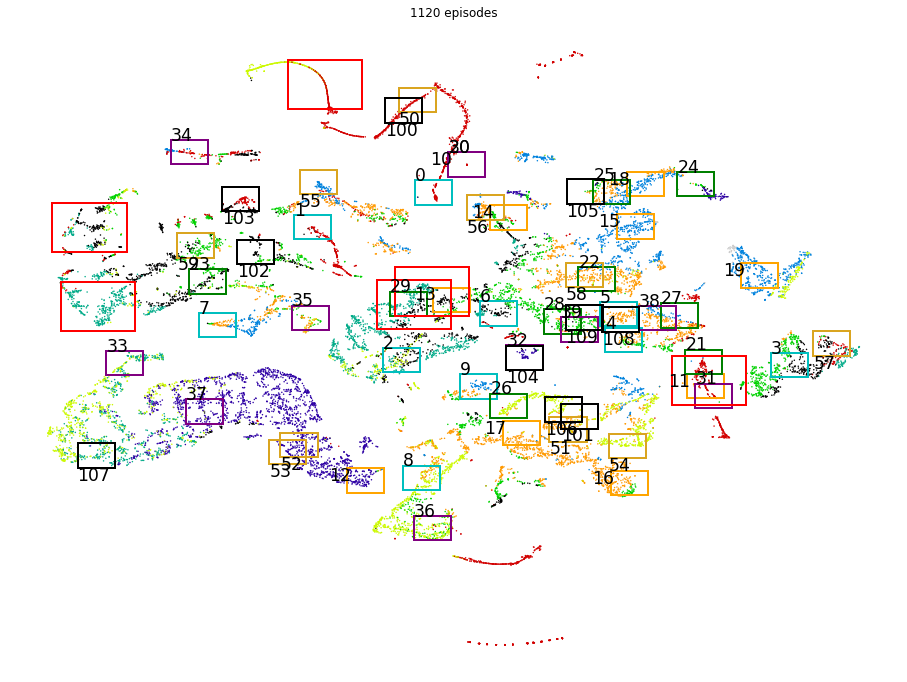

In [73]:
fig, ax = plt.subplots(1,1,figsize=(16,12))
for i in range(1,2):
    for j in range(1,2):
#         for k in range(0,9):
#             Ss[i*4+j][k] = k
        ax.scatter(Y[:, 0], Y[:, 1], c=Ss[i*4+2*j], cmap=plt.cm.get_cmap('nipy_spectral', 16), s=2.0, lw=0.05)
        ax.axis('off')
        ax.set_title(str(160*(i*4+2*j+1))+' episodes')
#         box_1 = patches.Rectangle((Y[1010,0]-10,Y[1010,1]-10),20,20,linewidth=2,edgecolor='r',facecolor='none')
#         ax[i,j].add_patch(box_1)
#         box_2 = patches.Rectangle((Y[1023,0]-10,Y[1023,1]-10),20,20,linewidth=2,edgecolor='b',facecolor='none')
#         ax[i,j].add_patch(box_2)
#         box_3 = patches.Rectangle((Y[1047,0]-10,Y[1047,1]-10),20,20,linewidth=2,edgecolor='g',facecolor='none')
#         ax[i,j].add_patch(box_3)
        box_1 = patches.Rectangle((Y[1073,0]-10,Y[1073,1]-10),20,20,linewidth=2,edgecolor='r',facecolor='none')
        ax.add_patch(box_1)
        for i in range(0,10):
            globals()['box_'+str(i+3)] = patches.Rectangle((Y[i*100+23,0]-5,Y[i*100+23,1]-5),10,10,linewidth=2,edgecolor='c',facecolor='none',label=str(i))
            ax.add_patch(globals()['box_'+str(i+3)])
            plt.text((globals()['box_'+str(i+3)]).get_x(), (globals()['box_'+str(i+3)]).get_y()+10, str(i), fontsize='xx-large')
        for i in range(10,20):
            globals()['box_'+str(i+3)] = patches.Rectangle((Y[i*100,0]-5,Y[i*100,1]-5),10,10,linewidth=2,edgecolor='orange',facecolor='none',label=str(i))
            ax.add_patch(globals()['box_'+str(i+3)])
            plt.text((globals()['box_'+str(i+3)]).get_x()-5, (globals()['box_'+str(i+3)]).get_y()+5, str(i), fontsize='xx-large')
        for i in range(20,30):
            globals()['box_'+str(i+3)] = patches.Rectangle((Y[i*100,0]-5,Y[i*100,1]-5),10,10,linewidth=2,edgecolor='g',facecolor='none',label=str(i))
            ax.add_patch(globals()['box_'+str(i+3)])
            plt.text((globals()['box_'+str(i+3)]).get_x(), (globals()['box_'+str(i+3)]).get_y()+10, str(i), fontsize='xx-large')
        for i in range(30,40):
            globals()['box_'+str(i+3)] = patches.Rectangle((Y[i*100,0]-5,Y[i*100,1]-5),10,10,linewidth=2,edgecolor='purple',facecolor='none',label=str(i))
            ax.add_patch(globals()['box_'+str(i+3)])
            plt.text((globals()['box_'+str(i+3)]).get_x(), (globals()['box_'+str(i+3)]).get_y()+10, str(i), fontsize='xx-large')
        for i in range(50,60):
            globals()['box_'+str(i+3)] = patches.Rectangle((Y[i*100+49,0]-5,Y[i*100+49,1]-5),10,10,linewidth=2,edgecolor='goldenrod',facecolor='none',label=str(i))
            ax.add_patch(globals()['box_'+str(i+3)])
            plt.text((globals()['box_'+str(i+3)]).get_x(), (globals()['box_'+str(i+3)]).get_y()-5, str(i), fontsize='xx-large')
        for i in range(100,110):
            globals()['box_'+str(i+3)] = patches.Rectangle((Y[i*100+53,0]-5,Y[i*100+53,1]-5),10,10,linewidth=2,edgecolor='black',facecolor='none',label=str(i))
            ax.add_patch(globals()['box_'+str(i+3)])
            plt.text((globals()['box_'+str(i+3)]).get_x(), (globals()['box_'+str(i+3)]).get_y()-5, str(i), fontsize='xx-large')
#         box_6 = patches.Rectangle((Y[1135,0]-10,Y[1135,1]-10),20,20,linewidth=2,edgecolor='orange',facecolor='none')
#         ax[i,j].add_patch(box_6)
#         box_7 = patches.Rectangle((Y[1160,0]-10,Y[1160,1]-10),20,20,linewidth=2,edgecolor='black',facecolor='none')
#         ax[i,j].add_patch(box_7)
#         box_8 = patches.Rectangle((Y[1172,0]-10,Y[1172,1]-10),20,20,linewidth=2,edgecolor='gold',facecolor='none')
#         ax[i,j].add_patch(box_8)
#         box_9 = patches.Rectangle((Y[1197,0]-10,Y[1197,1]-10),20,20,linewidth=2,edgecolor='gold',facecolor='none')
#         ax[i,j].add_patch(box_9)
#         box_10 = patches.Rectangle((Y[1384,0]-10,Y[1384,1]-10),20,20,linewidth=2,edgecolor='indigo',facecolor='none')
#         ax[i,j].add_patch(box_10)
        box_2 = patches.Rectangle((Y[3366,0]-10,Y[3366,1]-10),20,20,linewidth=2,edgecolor='r',facecolor='none')
        ax.add_patch(box_2)
        box_ = patches.Rectangle((Y[809,0]-10,Y[809,1]-10),20,20,linewidth=2,edgecolor='r',facecolor='none')
        ax.add_patch(box_)
        box_0 = patches.Rectangle((Y[2795,0]-10,Y[2795,1]-10),20,20,linewidth=2,edgecolor='r',facecolor='none')
        ax.add_patch(box_0)
        bbox_ = patches.Rectangle((Y[812,0]-10,Y[812,1]-10),20,20,linewidth=2,edgecolor='r',facecolor='none')
        ax.add_patch(bbox_)
        bbox_0 = patches.Rectangle((Y[2796,0]-10,Y[2796,1]-10),20,20,linewidth=2,edgecolor='r',facecolor='none')
        ax.add_patch(bbox_0)
# plt.savefig('mstates_evolution_'+system_type+'_'+str(n_test)+'_reduced_with_box.png',dpi=500)
plt.show()
plt.close()

In [139]:
print(Ss[6][398])
print(Ss[6][1204])
print(Ss[6][1587])
print(Ss[6][2200])

print("Tr.1")
for i in range(0,100):
    print(str(i)+': '+str(Ss[6][i]))
print("Tr.1")
for i in range(100,194):
    print(str(i)+': '+str(Ss[6][i]))
print("Tr.1")
for i in range(194,206):
    print(str(i)+': '+str(Ss[6][i]))
print("Tr.1")
for i in range(470,490):
    print(str(i)+': '+str(Ss[6][i]))
print("Tr.1")
for i in range(490,450):
    print(str(i)+': '+str(Ss[6][i]))
print("Tr.1")
for i in range(790,826):
    print(str(i)+': '+str(Ss[6][i]))
print("Tr.2")
for i in range(1182,1210):
    print(str(i)+': '+str(Ss[6][i]))
print("Tr.2")
for i in range(1567,1630):
    print(str(i)+': '+str(Ss[6][i]))
print("Tr.3")
for i in range(2792,2820):
    print(str(i)+': '+str(Ss[6][i]))
print("Tr.3")
for i in range(2573,2630):
    print(str(i)+': '+str(Ss[6][i]))
print("Tr.4")
for i in range(3510,3555):
    print(str(i)+': '+str(Ss[6][i]))
print("Tr.6")
for i in range(5525,5560):
    print(str(i)+': '+str(Ss[6][i]))
print("Tr.7")
for i in range(6151,6181):
    print(str(i)+': '+str(Ss[6][i]))
print("Tr.7")
for i in range(6468,6498):
    print(str(i)+': '+str(Ss[6][i]))
print("Tr.8")
for i in range(7830,7850):
    print(str(i)+': '+str(Ss[6][i]))
print("Tr.10")
for i in range(10347,10385):
    print(str(i)+': '+str(Ss[6][i]))

1.0
1.0
6.0
6.0
Tr.1
0: 0.0
1: 1.0
2: 2.0
3: 3.0
4: 4.0
5: 5.0
6: 6.0
7: 7.0
8: 8.0
9: 7.0
10: 7.0
11: 7.0
12: 7.0
13: 7.0
14: 7.0
15: 7.0
16: 7.0
17: 7.0
18: 7.0
19: 7.0
20: 7.0
21: 7.0
22: 7.0
23: 7.0
24: 7.0
25: 7.0
26: 7.0
27: 7.0
28: 7.0
29: 7.0
30: 7.0
31: 7.0
32: 7.0
33: 7.0
34: 7.0
35: 7.0
36: 7.0
37: 7.0
38: 7.0
39: 7.0
40: 7.0
41: 7.0
42: 7.0
43: 7.0
44: 7.0
45: 7.0
46: 7.0
47: 7.0
48: 7.0
49: 7.0
50: 7.0
51: 7.0
52: 7.0
53: 7.0
54: 7.0
55: 7.0
56: 7.0
57: 7.0
58: 7.0
59: 7.0
60: 7.0
61: 7.0
62: 7.0
63: 7.0
64: 7.0
65: 7.0
66: 7.0
67: 7.0
68: 7.0
69: 7.0
70: 7.0
71: 7.0
72: 7.0
73: 7.0
74: 7.0
75: 7.0
76: 7.0
77: 7.0
78: 5.0
79: 5.0
80: 5.0
81: 5.0
82: 5.0
83: 5.0
84: 5.0
85: 5.0
86: 5.0
87: 5.0
88: 7.0
89: 7.0
90: 7.0
91: 7.0
92: 7.0
93: 7.0
94: 7.0
95: 7.0
96: 7.0
97: 7.0
98: 7.0
99: 7.0
Tr.1
100: 7.0
101: 7.0
102: 7.0
103: 7.0
104: 7.0
105: 7.0
106: 7.0
107: 7.0
108: 7.0
109: 7.0
110: 7.0
111: 7.0
112: 7.0
113: 7.0
114: 7.0
115: 7.0
116: 7.0
117: 7.0
118: 7.0
119: 7.0
120:

In [50]:
print(Y[:,0].argmax())

5541


In [86]:
print(Ss[0].shape)
x = np.array(np.nonzero(Ss[0] == 10))
print(x.shape)
# print(x)
print((x[0,0:14*60]).reshape([-1,14]))

(9990,)
(1, 0)
[]


IndexError: list index out of range

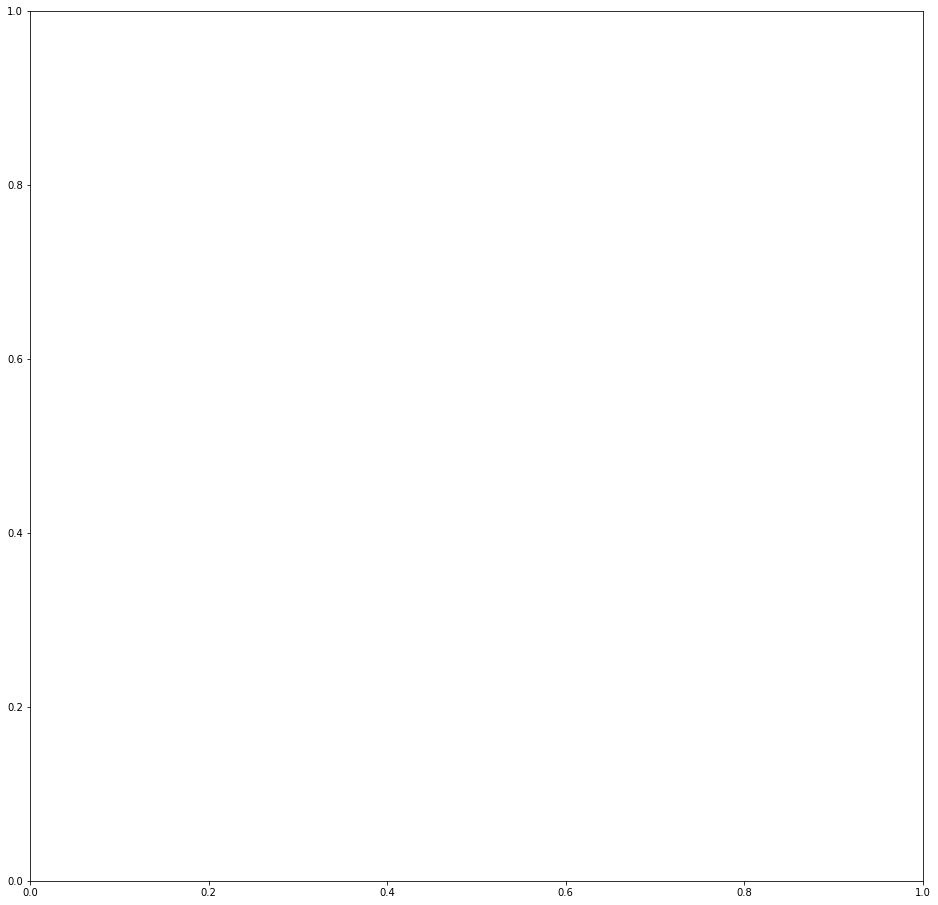

In [64]:
frames = np.array([[1139,5537],[398,4496],[1194,7970],[809,2795],[6557,13276],[4777,10374],[1587,2200],[5060,4117]])
col = ['black','purple','blue','c','g','gold','orange','r']
fig, ax = plt.subplots(1,1,figsize=(16,16))
ax.scatter(Y[:, 0], Y[:, 1], c=Ss[6], cmap=plt.cm.get_cmap('nipy_spectral', 16), s=2.0, lw=0.05)
ax.axis('off')
for i in range(0,8):
    globals()['box_'+str(i)+'_0'] = patches.Rectangle((Y[frames[i,0],0]-4,Y[frames[i,0],1]-4),8,8,linewidth=4,edgecolor=col[i],facecolor='none',label=str(i))
    ax.add_patch(globals()['box_'+str(i)+'_0'])
    plt.text((globals()['box_'+str(i)+'_0']).get_x()+2, (globals()['box_'+str(i)+'_0']).get_y()+10, str(i), fontsize='xx-large')
    globals()['box_'+str(i)+'_1'] = patches.Rectangle((Y[frames[i,1],0]-4,Y[frames[i,1],1]-4),8,8,linewidth=4,edgecolor=col[i],facecolor='none',label=str(i))
    ax.add_patch(globals()['box_'+str(i)+'_1'])
    plt.text((globals()['box_'+str(i)+'_1']).get_x()+2, (globals()['box_'+str(i)+'_1']).get_y()+10, str(i), fontsize='xx-large')


plt.savefig('mstates_'+system_type+'_'+str(n_test)+'_boxes.png',dpi=500)
plt.show()
plt.close()

In [16]:
def frame_image(img, frame_width):
    b = frame_width # border size in pixel
    ny, nx = img.shape[0], img.shape[1] # resolution / number of pixels in x and y
    if img.ndim == 3: # rgb or rgba array
        framed_img = np.zeros((b+ny+b, b+nx+b, img.shape[2]))
    elif img.ndim == 2: # grayscale image
        framed_img = np.zeros((b+ny+b, b+nx+b))
    framed_img[b:-b, b:-b] = img
    return framed_img

In [90]:
import matplotlib.image as mpimg
pics=[]
for i in range(0,9):
    pics_ = []
    for j in range(0,2):
        pics_.append(mpimg.imread('selected_frames/test_'+str(n_test)+'_'+str(iter_)+'/'+str(frames[i,j])+'.jpg'))
    pics.append(pics_)

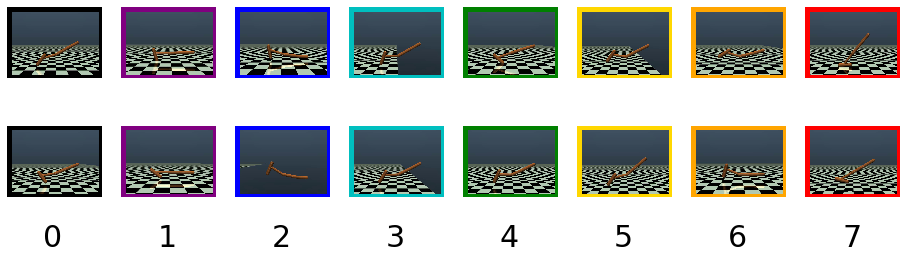

In [224]:
fig, ax = plt.subplots(2,8,figsize=(16,4))
for i in range(0,8):
    for j in range(0,2):
        ax[j,i].imshow(pics[i][j])
        ax[j,i].axis('off')
        globals()['box_'+str(i*2+j)] = patches.Rectangle((5,5),1024,768,linewidth=8,edgecolor=col[i],facecolor='none',label=str(i))
        ax[j,i].add_patch(globals()['box_'+str(i*2+j)])
    # fig.text((globals()['box_'+str(i*2)]).get_x()-1800, (globals()['box_'+str(i*2)]).get_y()-1120*(7-i)+520, str(i), fontsize=30)
    fig.text(((i-7)/11)*1.09+0.85,0, str(i), fontsize=30)
plt.savefig('selected_frames.png',dpi=500)
plt.show()
plt.close()

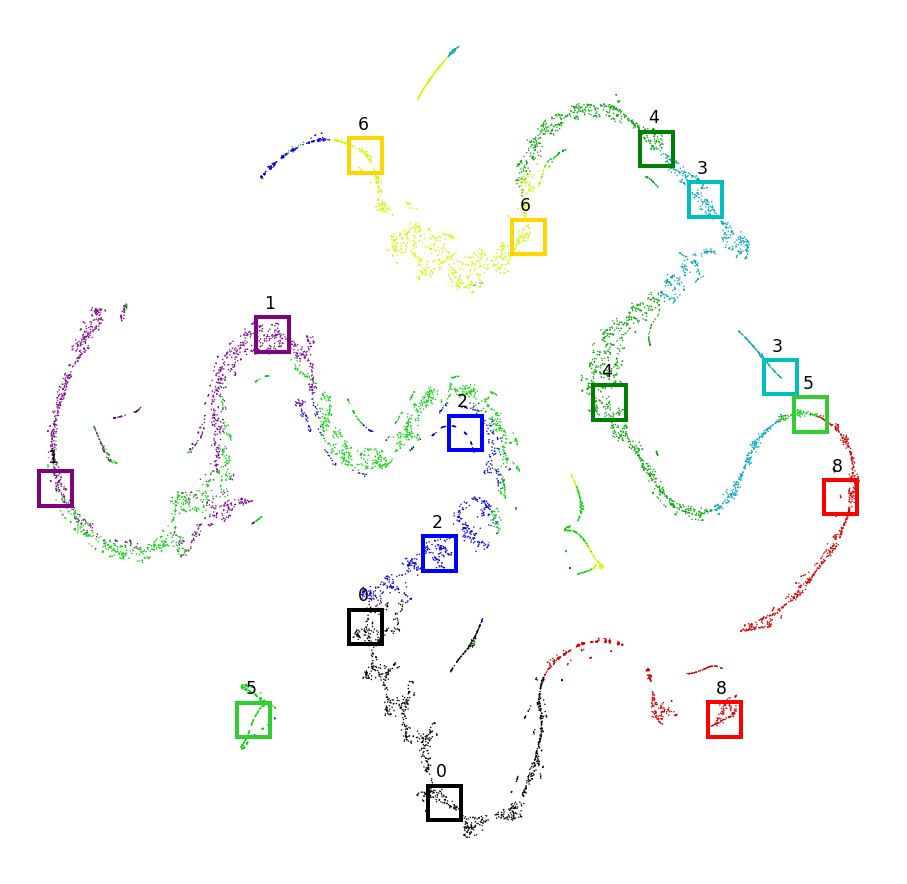

In [85]:
frames = np.array([[3325,4412],[926,4671],[6095,7814],[3069,2220],[6375,1469],[4797,1010],[5856,7280],[8879,74],[1106,9097]])
col = ['black','purple','blue','c','g','limegreen','gold','r','gray']
fig, ax = plt.subplots(1,1,figsize=(16,16))
ax.scatter(Y[:, 0], Y[:, 1], c=Ss[0], cmap=plt.cm.get_cmap('nipy_spectral', 16), s=2.0, lw=0.05)
ax.axis('off')
for i in range(0,8):
    text_ = str(i)
    if i > 6:
        text_ = str(i+1)
    globals()['box_'+str(i)+'_0'] = patches.Rectangle((Y[frames[i,0],0]-4,Y[frames[i,0],1]-4),8,8,linewidth=4,edgecolor=col[i],facecolor='none',label=str(i))
    ax.add_patch(globals()['box_'+str(i)+'_0'])
    plt.text((globals()['box_'+str(i)+'_0']).get_x()+2, (globals()['box_'+str(i)+'_0']).get_y()+10, text_, fontsize='xx-large')
    globals()['box_'+str(i)+'_1'] = patches.Rectangle((Y[frames[i,1],0]-4,Y[frames[i,1],1]-4),8,8,linewidth=4,edgecolor=col[i],facecolor='none',label=str(i))
    ax.add_patch(globals()['box_'+str(i)+'_1'])
    plt.text((globals()['box_'+str(i)+'_1']).get_x()+2, (globals()['box_'+str(i)+'_1']).get_y()+10, text_, fontsize='xx-large')

plt.savefig('mstates_'+system_type+'_'+str(n_test)+'_boxes.png',dpi=500)
plt.show()
plt.close() #1094, 435, 2337, , , , 

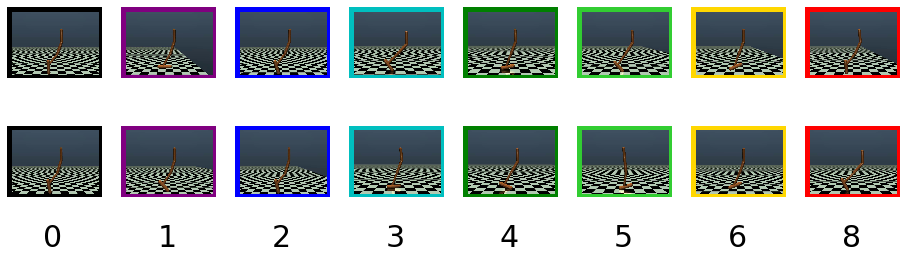

In [91]:
fig, ax = plt.subplots(2,8,figsize=(16,4))
for i in range(0,8):
    text_ = str(i)
    if i > 6:
        text_ = str(i+1)
    for j in range(0,2):
        ax[j,i].imshow(pics[i][j])
        ax[j,i].axis('off')
        globals()['box_'+str(i*2+j)] = patches.Rectangle((5,5),1024,768,linewidth=8,edgecolor=col[i],facecolor='none',label=str(i))
        ax[j,i].add_patch(globals()['box_'+str(i*2+j)])
    # fig.text((globals()['box_'+str(i*2)]).get_x()-1800, (globals()['box_'+str(i*2)]).get_y()-1120*(7-i)+520, str(i), fontsize=30)
    fig.text(((i-7)/11)*1.09+0.85,0, text_, fontsize=30)
plt.savefig('selected_frames.png',dpi=500)
plt.show()
plt.close()

standard: 1.4 sec
ltsa: 1.4 sec
hessian: 2.3 sec
modified: 2.2 sec
Isomap: 8.9 sec
MDS: 25 sec
SpectralEmbedding: 0.95 sec
t-SNE: 36 sec


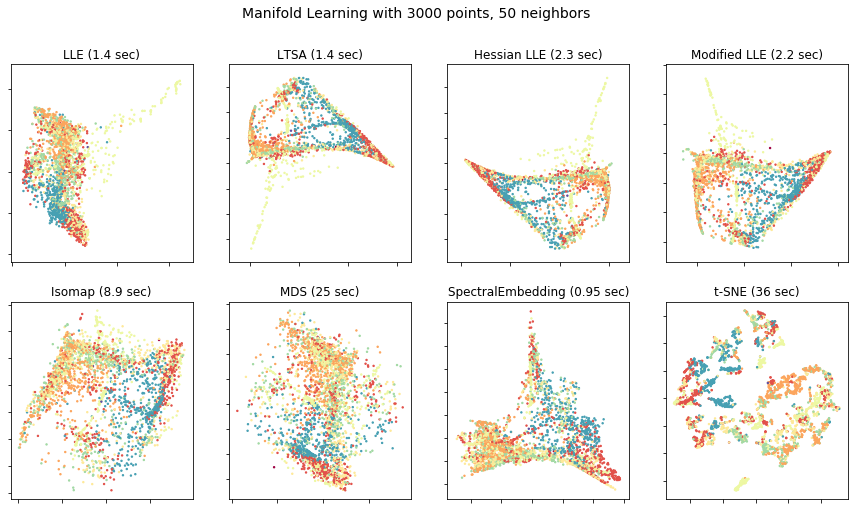

In [191]:
fig = plt.figure(figsize=(15, 8))
plt.suptitle("Manifold Learning with %i points, %i neighbors"
             % (n_points, n_neighbors), fontsize=14)

methods = ['standard', 'ltsa', 'hessian', 'modified']
labels = ['LLE', 'LTSA', 'Hessian LLE', 'Modified LLE']

for i, method in enumerate(methods):
    t0 = time()
    Y = manifold.LocallyLinearEmbedding(n_neighbors, n_components,
                                        eigen_solver='auto',
                                        method=method).fit_transform(X)
    t1 = time()
    print("%s: %.2g sec" % (methods[i], t1 - t0))

    ax = fig.add_subplot(241 + i)
    plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral, s=2.0)
    plt.title("%s (%.2g sec)" % (labels[i], t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    plt.axis('tight')

t0 = time()
Y = manifold.Isomap(n_neighbors, n_components).fit_transform(X)
t1 = time()
print("Isomap: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(245)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral, s=2.0)
plt.title("Isomap (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')


t0 = time()
mds = manifold.MDS(n_components, max_iter=100, n_init=1)
Y = mds.fit_transform(X)
t1 = time()
print("MDS: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(246)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral, s=2.0)
plt.title("MDS (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')


t0 = time()
se = manifold.SpectralEmbedding(n_components=n_components,
                                n_neighbors=n_neighbors)
Y = se.fit_transform(X)
t1 = time()
print("SpectralEmbedding: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(247)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral, s=2.0)
plt.title("SpectralEmbedding (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

t0 = time()
tsne = manifold.TSNE(n_components=n_components, init='pca', random_state=0)
Y = tsne.fit_transform(X)
t1 = time()
print("t-SNE: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(2, 4, 8)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral, s=2.0)
plt.title("t-SNE (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

plt.show()